In [ ]:
import numpy as np
import pandas as pd
import re
data = pd.read_csv('/content/paa3.csv')
data=data.sample(frac=1)
data=data[:20000]

In [ ]:
category = {}
for i in range(len(data)):
    cell_value = data.iloc[i]["paraphrases"]
    if isinstance(cell_value, str):
        chatgpt = cell_value[1:-1].split(', ')
        for j in chatgpt[:1]:
            category[j[1:-1]] = 'chatgpt'
    category[data.iloc[i]['text']] = "human"


In [ ]:
data=pd.DataFrame(category.items(),columns=["text","category"])
data=data.sample(frac=1)
data=data[:10000]
data

,text,category
231,What is the difference in pleasure between mas...,human
1462,What are the stall speed and angle of attack o...,chatgpt
1190,When printing black and white document,chatgpt
1559,How many words are actually needed to learn fo...,human
786,Is it possible for a billion dollar lottery Ja...,chatgpt
...,...,...
1546,What is the reason for our concern about the v...,chatgpt
541,When travelling to a new region is it better t...,human
480,Is it possible for us to exchange positions at...,chatgpt
400,Does Arnab Goswami support the BJP?,chatgpt


In [ ]:
data['category']=data['category'].map({"chatgpt":0,"human":1})
data

,text,category
231,What is the difference in pleasure between mas...,1
1462,What are the stall speed and angle of attack o...,0
1190,When printing black and white document,0
1559,How many words are actually needed to learn fo...,1
786,Is it possible for a billion dollar lottery Ja...,0
...,...,...
1546,What is the reason for our concern about the v...,0
541,When travelling to a new region is it better t...,1
480,Is it possible for us to exchange positions at...,0
400,Does Arnab Goswami support the BJP?,0


In [ ]:
data["category"].value_counts()

1    999
0    999
Name: category, dtype: int64

In [ ]:
print(data['text'].iloc[100])

What is the reason for the scarcity of apps similar to Word Lens?


In [ ]:
from sklearn.model_selection import train_test_split
X=data['text']
y=data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
# X_train=X_train_tfidf.toarray()
# X_test=X_test_tfidf.toarray()

In [ ]:
# print(X_train_tfidf.toarray())

In [ ]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

In [ ]:
# lg = LogisticRegression(penalty='l1',solver='liblinear')
# sv = SVC(kernel='sigmoid',gamma=1.0, probability=True)
# mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# knn = KNeighborsClassifier()
# rfc = RandomForestClassifier(n_estimators=50,random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
# abc = AdaBoostClassifier(n_estimators=50,random_state=2)
# bg = BaggingClassifier(n_estimators=50,random_state=2)
# gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [ ]:
# from sklearn import metrics

In [ ]:
# def score_prediction(model,X_train,X_test,y_train,y_test):
#     model.fit(X_train,y_train)
#     pr = model.predict(X_test)
#     acc_score = metrics.accuracy_score(y_test,pr)
#     pre_score = metrics.precision_score(y_test,pr,average="binary", pos_label="chatgpt")
#     recall= metrics.recall_score(y_test,pr,average="binary", pos_label="chatgpt")
#     f1= metrics.f1_score(y_test,pr,average="binary", pos_label="chatgpt")
#     mcc= metrics.matthews_corrcoef(y_test,pr)
#     return acc_score,pre_score,recall,f1,mcc

In [ ]:
# from sklearn import tree

# # Prepare some data
# # features = [[140, 1], [130, 1], [150, 0], [170, 0]]
# # labels = [0, 0, 1, 1]

# # Create a decision tree classifier
# clf = tree.DecisionTreeClassifier()

# # Train the classifier
# clf = clf.fit(X_train, y_train)

# # Predict the labels of new data
# # new_data = [[150, 1], [160, 0]]
# # predicted_labels = clf.predict(new_data)

# # Print the predicted labels
# # print(predicted_labels)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       198
           1       0.72      0.67      0.69       202

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400



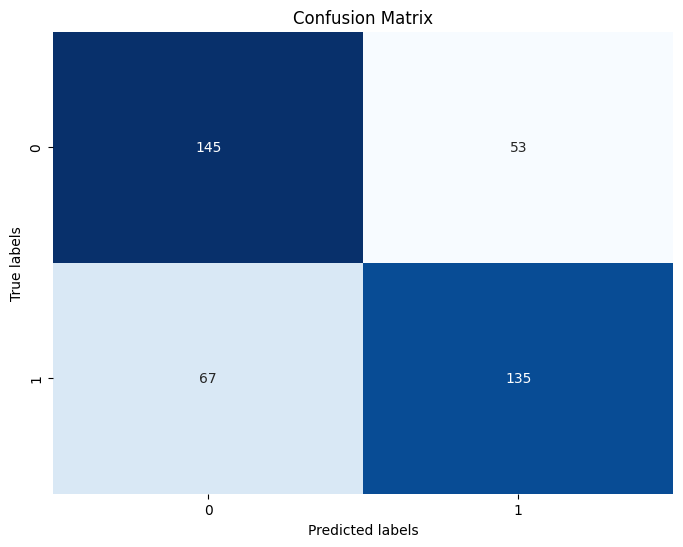

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Sample input text
input_text = ['That sounds fantastic! Hackathons are a great way']

# Initialize TfidfVectorizer
# vectorizer = TfidfVectorizer()

# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)

# X_train=X_train_tfidf.toarray()
# X_test=X_test_tfidf.toarray()

# # Vectorize the input text
# X_train_tfidf = vectorizer.fit_transform(input_text)
# X_train = X_train_tfidf.toarray()

# Sample target labels
# y_train = [0, 1]  # Sample label, adjust as needed

# Initialize the classifier
# clf = LogisticRegression()

# Check the dimensions of X_train and y_train
# print("Dimensions of X_train:", X_train.shape)
# print("Dimensions of y_train:", len(y_train))

# Ensure that the number of samples matches
# if X_train.shape[0] != len(y_train):
#     raise ValueError("Number of samples in X_train and y_train do not match!")

# Fit the classifier to the training data
# clf.fit(X_train, y_train)

# Transform the input text to a feature vector
input_vector = vectorizer.transform(input_text).toarray()

# Predict using the trained classifier
prediction = clf.predict(input_vector)

print("Prediction:", prediction)


Prediction: [0]
